In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
from pathlib import Path
from umap import UMAP

import sys
sys.path.insert(0, "..")   
from src.utils import load_embeddings_pair, UMAP_reduce, stack_embeddings, prepare_shared_umap
from src.plot_util import plot_low_dim_panels, plot_shared_embeddings

In [2]:
%reload_ext autoreload
%autoreload 2

In [3]:
proteinclip_df, proteinclip_wt, proteinclip_mut = load_embeddings_pair("../output/data/proteinclip_structural_split_train_with_embeddings.csv", return_arrays=True)
esm1_df, esm1_wt, esm1_mut = load_embeddings_pair("../output/data/esmv1_structural_split_train_with_embeddings.csv", return_arrays=True)
esm2_df, esm2_wt, esm2_mut = load_embeddings_pair("../output/data/esm2_t33_650M_UR50D_structural_split_train_with_embeddings.csv", return_arrays=True)
mutaplm_df, mutaplm_wt, mutaplm_mut = load_embeddings_pair("../output/data/mutaplm_structural_split_train_with_embeddings.csv", return_arrays=True)

In [4]:
print(proteinclip_df['protein1_embedding'].iloc[0].shape)
print(esm1_df['protein1_embedding'].iloc[0].shape)
print(esm2_df['protein1_embedding'].iloc[0].shape)
print(mutaplm_df['protein1_embedding'].iloc[0].shape)

(128,)
(1280,)
(1280,)
(4096,)


In [5]:
esm1_df.iloc[10:,11]

10      [-0.6309643, 0.2031431, -0.48043844, 0.271446,...
11      [-0.2412799, 0.22559428, -0.29401976, -0.08504...
12      [-0.03328724, 0.2598753, -0.12208852, -0.07293...
13      [0.011510702, -0.006058493, -0.23428139, 0.051...
14      [0.01338504, 0.0894772, -0.048774704, 0.104724...
                              ...                        
1995    [-0.021220611, 0.13680503, -0.12531759, -0.008...
1996    [-0.041606724, 0.13133164, -0.1034366, -0.0071...
1997    [-0.09819674, 0.17200938, -0.27705428, -0.0114...
1998    [-0.04022965, 0.07760094, -0.25560445, -0.0187...
1999    [0.031455286, 0.014400812, -0.047043394, 0.110...
Name: protein2_embedding, Length: 1990, dtype: object

In [6]:
proteinclip_embs, n1 = stack_embeddings(proteinclip_df)
esmv1_embs, n2 = stack_embeddings(esm1_df)
esmv2_embs, n3 = stack_embeddings(esm2_df)
mutaplm_embs, n4 = stack_embeddings(mutaplm_df)

In [7]:
print(n1, n2, n3, n4)

2000 2000 2000 2000


In [8]:
proteinclip_umap = UMAP_reduce(proteinclip_embs)
esmv1_umap = UMAP_reduce(esmv1_embs)
esmv2_umap = UMAP_reduce(esmv2_embs)
mutaplm_umap = UMAP_reduce(mutaplm_embs)


/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


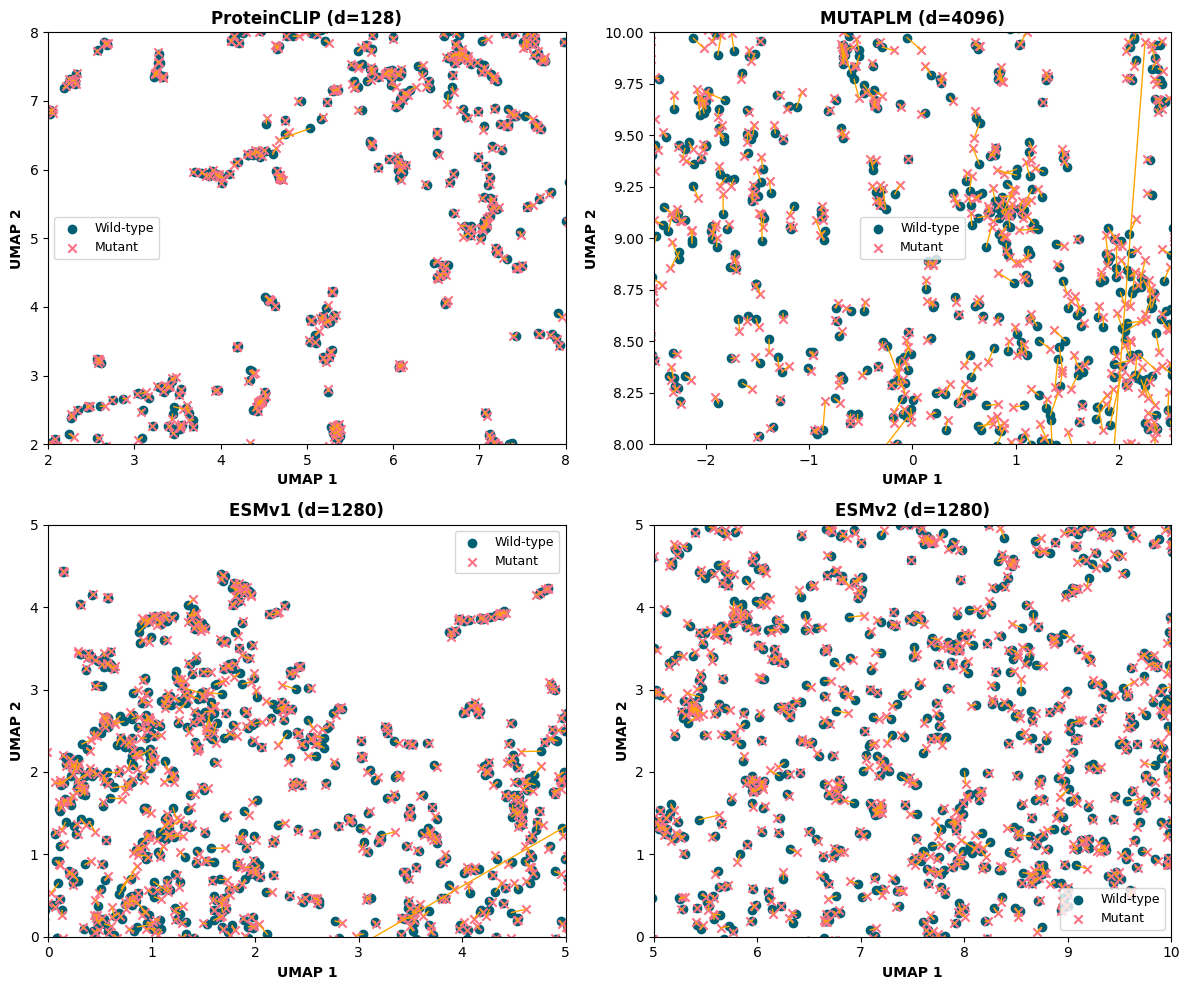

In [15]:
# four sets of embeddings
low_dim_sets = [
    (proteinclip_umap[:n1], proteinclip_umap[n1:]),
    (mutaplm_umap[:n4], mutaplm_umap[n4:]),
    (esmv1_umap[:n2], esmv1_umap[n2:]),
    (esmv2_umap[:n3], esmv2_umap[n3:]),
]

titles = ["ProteinCLIP (d=128)",  "MUTAPLM (d=4096)", "ESMv1 (d=1280)", "ESMv2 (d=1280)"]
xlims = [(2,8),(-2.5,2.5), (0,5), (5,10)]
ylims = [(2,8), (8,10), (0,5), (0,5)]
# xlims = [None,None, None, None]
# ylims = [None, None, None, None]

save_path = "../output/figure/2000_umap_4_models_wt_mutant_2.tiff"

plot_low_dim_panels(
    low_dim_sets,
    titles=titles,
    figsize=(12, 10),
    xlims=xlims,
    ylims=ylims,
    xticks=None,
    yticks=None,
    xlabel="UMAP 1",
    ylabel="UMAP 2",
    title_fontsize=12,
    label_fontsize=10,
    legend_fontsize=9,
    save_path=save_path,
    dpi=300,
)


In [8]:
coords, (scaler, reducer) = prepare_shared_umap(
    {
        "ESMv1": (esm1_wt, esm1_mut),          # e.g., 1280-D
        "ESM2": (esm2_wt, esm2_mut),           # e.g., 1280-D
        "MutaPLM": (mutaplm_wt, mutaplm_mut),  # e.g., 1024-D
        "ProteinCLIP": (proteinclip_wt, proteinclip_mut),    # 128-D
    },
    target_width=None,        # auto: max across models 
    pad_value=0.0,            # zero pad smaller models
    pad_side="right",         # pad at the end of the vector
    standardize=True,
    n_neighbors=25,
    min_dist=0.05,
    random_state=42,
    return_objects=True,
)

/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/Users/yvesgreatti/.pyenv/versions/bio/lib/python3.12/site-packages/sklearn/manifold/_spectral_embedding.py:328: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(


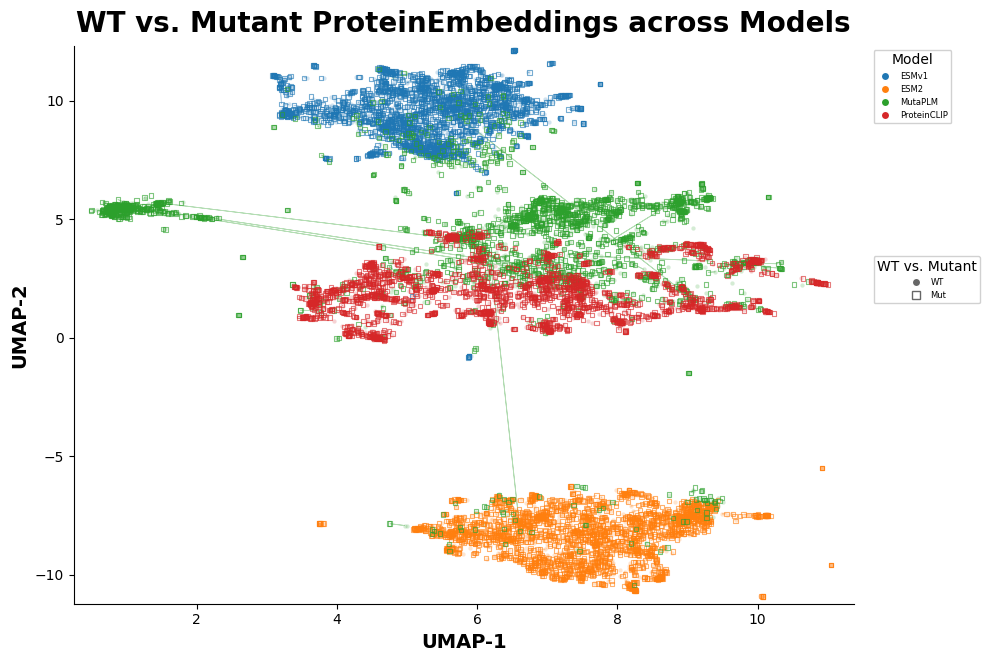

In [ ]:
save_path = Path("../output/figure/shared_umap_all_models.tiff")

plot_shared_embeddings(
    coords,
    title="WT vs. Mutant ProteinEmbeddings across Models",
    label_fontsize=14,
    title_fontsize=20,
    legend_fontsize=6,
    save_path=save_path,
    figsize=(10, 8),
    wt_alpha=0.2,
    wt_size=10,
    wt_edge_lw=0.5,
    mut_alpha=0.6,
    mut_size=10,
    mut_edge_lw=0.8,
    robust_limits=True,
    limit_quantiles=(0.01, 0.99),
    margin=0.05,
)
